Os parâmetos para o polinômio são:  [-1.02514832  1.23406256  0.68853367]
Primeira raiz =  -0.41492399371012895
Segunda raiz =  1.6187132662952342
Como queremos o fim da tragetória estamos interessados na maior raiz.
Assim, temos que a posição que o projetil atinge o solo é 
1.6187132662952342 Unidades de Medida 

Podemos confirmar isso colocando a segunda raiz como parâmetro no polinômio e resultando 0,já que seria o valor de y(altura) equivalente a esse x
-3.3306690738754696e-16
como pode observar,confirmado


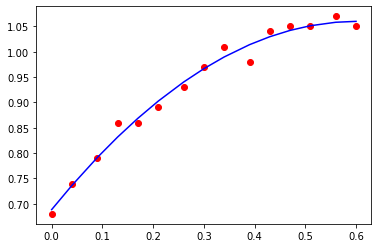

In [ ]:
#Importando Bibliotecas necessárias 
from numpy import *
from numpy.linalg import solve
import matplotlib.pyplot as pp

#CARREGANDO O DATASET em um variável
DataSet = array([
[0.00, 0.68],
[0.04, 0.74],
[0.09, 0.79],
[0.13, 0.86],
[0.17, 0.86],
[0.21, 0.89],
[0.26, 0.93],
[0.30, 0.97],
[0.34, 1.01],
[0.39, 0.98],
[0.43, 1.04],
[0.47, 1.05],
[0.51, 1.05],
[0.56, 1.07],
[0.60, 1.05],
])

#Número de linhas
m = DataSet.shape[0]

#Função que recebe uma matriz e retorna a mesma escolonada
def escalonamento(A):
    A = A.copy()
    epsilon = 1e-9
    m,n = A.shape
    for j in range(min(m,n)):
        if abs(A[j,j])<epsilon:
            for i in range(j+1,m):
                if abs(A[i,j])>epsilon:
                    aux = A[i,:].copy()
                    A[i,:] = A[j,:].copy()
                    A[j,:] = aux
                    break      
        if abs(A[j,j])>epsilon:
            for i in range(j+1,m):
                A[i,:] = A[i,:] - A[i,j]/A[j,j]*A[j,:]
    return A

#Função que resolve sistema linear com substituição reversa
def substituicaoReversa(Ab):
    m,n = Ab.shape
    n = n - 1
    A = Ab[:,:n]
    b = Ab[:,n]
    indices = range(m)
    indices = list(indices)
    indices.reverse()
    x = zeros(n)
    for i in indices:
        soma = 0
        for j in range(i+1,m):
            soma = soma + A[i,j]*x[j]
        x[i] = 1/A[i,i]*(b[i] - soma)
    return x


#A irá guardar uma matriz que contem os x^2,x e os 1.
A = column_stack((DataSet[:,0]**2,DataSet[:,0],ones((m,1))))

#b vai guardar os y do dataset
b = DataSet[:,1]

#Usando a propriedade:
#A^t . A .alfa =  A^t . b
#podemos descobrir alfa
#onde alfa é os coeficientes do polinómio

#lado esquedo da propriedade
AA = A.T@A

#lado direito da propriedade
bb = A.T@b

#escalonando e usando substituição reversa para descobrir os parâmetros
Ab = column_stack((AA,bb))
Abe = escalonamento(Ab)
alfa = substituicaoReversa(Abe)

print("Os parâmetos para o polinômio são: ",alfa)

#função para o calculo do polinómio
p = lambda x: alfa[0]*x**2 + alfa[1] * x + alfa[2]

x = DataSet[:,0]

pp.plot(x,b,'or',x,p(x),'b')

#Calculando a raiz para obter o local estimado para o fim da tragétoria do objeto
#fórmula de bhaskara para obter as raizes
discriminante = alfa[1]**2 - 4*alfa[0]*alfa[2]
raiz1 = (-alfa[1] + sqrt(discriminante)) /(2*alfa[0])
raiz2 = (-alfa[1] - sqrt(discriminante)) /(2*alfa[0])

print("Primeira raiz = ",raiz1)
print("Segunda raiz = ",raiz2)

print("Como queremos o fim da tragetória estamos interessados na maior raiz.")
print("Assim, temos que a posição que o projetil atinge o solo é ")
print(raiz2,'Unidades de Medida \n')

print("Podemos confirmar isso colocando a segunda raiz como parâmetro no polinômio e resultando 0,já que seria o valor de y(altura) equivalente a esse x")
print(p(raiz2))
print("como pode observar,confirmado")